In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
df = pd.read_csv("Задания/Datasets/cigarettes.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['name','carbon monoxide', 'tar', 'nicotine', 'weight']
print(df.shape)
df.head(20)

(25, 5)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_66329/1435826511.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/cigarettes.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,name,carbon monoxide,tar,nicotine,weight
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,29.8,2.03,1.1650,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4
5,Chesterfield,15.0,1.04,0.8885,15.0
6,GoldenLights,8.8,0.76,1.0267,9.0
7,Kent,12.4,0.95,0.9225,12.3
8,Kool,16.6,1.12,0.9372,16.3
9,L&M,14.9,1.02,0.8858,15.4


In [10]:
X = df.drop(['carbon monoxide', 'name'], axis=1)
y = df['carbon monoxide']

In [11]:
#1
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Quadratic Regression
poly2 = PolynomialFeatures(degree=2)  # Creating quadratic features
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model_quad = LinearRegression()
model_quad.fit(X_train_poly2, y_train)

y_pred_quad = model_quad.predict(X_test_poly2)
mse_quad = mean_squared_error(y_test, y_pred_quad)
r2_quad = r2_score(y_test, y_pred_quad)

# Cubic Regression
poly3 = PolynomialFeatures(degree=3)  # Creating cubic features
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

model_cubic = LinearRegression()
model_cubic.fit(X_train_poly3, y_train)

y_pred_cubic = model_cubic.predict(X_test_poly3)
mse_cubic = mean_squared_error(y_test, y_pred_cubic)
r2_cubic = r2_score(y_test, y_pred_cubic)

In [12]:
print(f'MSE for linear regression: {mse_linear}')
print(f'R² for linear regression: {r2_linear}\n')

print(f'MSE for quadratic regression: {mse_quad}')
print(f'R² for quadratic regression: {r2_quad}\n')

print(f'MSE for cubic regression: {mse_cubic}')
print(f'R² for cubic regression: {r2_cubic}')

MSE for linear regression: 1.8046663950501416
R² for linear regression: 0.7210024468468499

MSE for quadratic regression: 3.3108447986011913
R² for quadratic regression: 0.4881504968380035

MSE for cubic regression: 10.11003730899659
R² for cubic regression: -0.5629900790715039


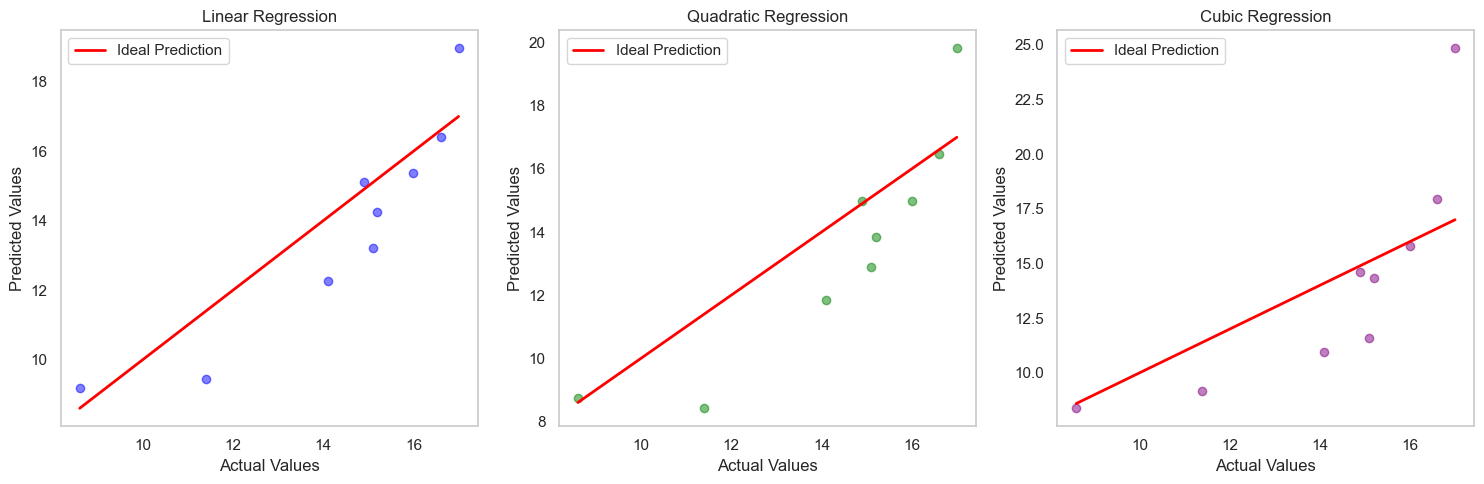

In [13]:
# Plot for Linear Regression
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  # First plot
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Plot for Quadratic Regression
plt.subplot(1, 3, 2)  # Second plot
plt.scatter(y_test, y_pred_quad, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.title('Quadratic Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Plot for Cubic Regression
plt.subplot(1, 3, 3)  # Third plot
plt.scatter(y_test, y_pred_cubic, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.title('Cubic Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Был случай когда r2 обратился меньше нуля, это связанно с размером выборки, он очень мал - 25 элементов.

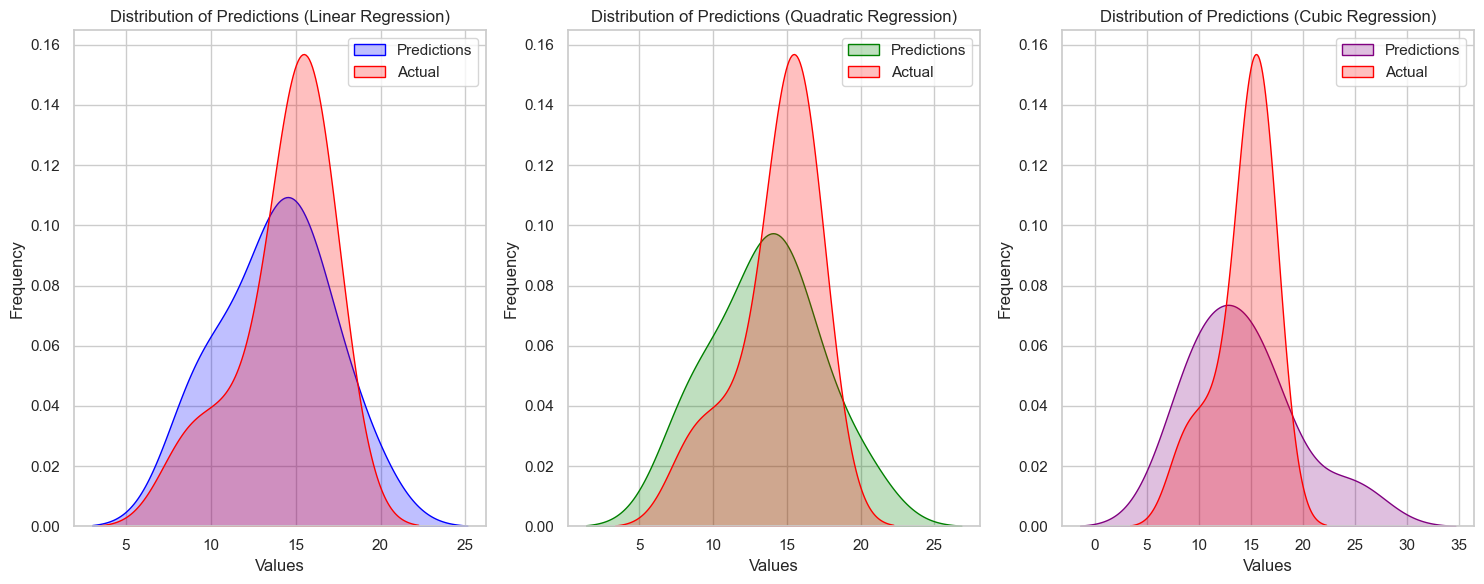

In [14]:
# Setting the seaborn style
sns.set(style="whitegrid")

# Creating the distribution plot
plt.figure(figsize=(15, 6))

# Plot for Linear Regression
plt.subplot(1, 3, 1)  # First plot
sns.kdeplot(y_pred_linear, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions (Linear Regression)")
plt.legend()

# Plot for Quadratic Regression
plt.subplot(1, 3, 2)  # Second plot
sns.kdeplot(y_pred_quad, color="green", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions (Quadratic Regression)")
plt.legend()

# Plot for Cubic Regression
plt.subplot(1, 3, 3)  # Third plot
sns.kdeplot(y_pred_cubic, color="purple", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions (Cubic Regression)")
plt.legend()

plt.tight_layout()
plt.show()

- Линейная регрессия является наилучшей моделью среди трех, так как она показывает наименьшие ошибки и наиболее высокую объяснительную способность.
- Квадратичная регрессия демонстрирует худшие результаты, чем линейная, но все же превосходит кубическую модель.
- Кубическая регрессия показывает самые плохие результаты, указывая на то, что сложность модели не приводит к лучшему качеству предсказаний.
### Ремарка, в случае малой выборки***

